# Python Project - Churn
## Adam, Ami, Gal

## Insert File Path

In [116]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = r'INSERT PATH OF FILE'
churn = pd.read_csv(path+'\churn.csv')

In [117]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Could use GetDummies, But this way we could also recode and alter features simultaneously


In [118]:
churn.loc[churn.gender == 'Female', 'sex_male'] = 0
churn.loc[churn.gender == 'Male', 'sex_male'] = 1

churn.loc[churn.Partner == 'No', 'hes Partner'] = 0
churn.loc[churn.Partner == 'Yes', 'hes Partner'] = 1

churn.loc[churn.Dependents == 'No', 'Dependents'] = 0
churn.loc[churn.Dependents == 'Yes', 'Dependents'] = 1

churn.loc[churn.PhoneService == 'No', 'PhoneService'] = 0
churn.loc[churn.PhoneService == 'Yes', 'PhoneService'] = 1

churn.loc[churn.MultipleLines == 'No', 'MultipleLines'] = 0
churn.loc[churn.MultipleLines == 'Yes', 'MultipleLines'] = 1
churn.loc[churn.MultipleLines == 'No phone service', 'MultipleLines'] =0

churn.loc[churn.InternetService == 'Fiber optic', 'Fiber optic'] = 1
churn.loc[churn.InternetService == 'DSL', 'Fiber optic'] = 0
churn.loc[churn.InternetService == 'No', 'Fiber optic'] = 0

churn.loc[churn.InternetService == 'Fiber optic', 'InternetService'] = 1
churn.loc[churn.InternetService == 'No', 'InternetService'] = 0
churn.loc[churn.InternetService == 'DSL', 'InternetService'] = 1


churn.loc[churn.OnlineSecurity == 'No', 'OnlineSecurity'] = 0
churn.loc[churn.OnlineSecurity == 'Yes', 'OnlineSecurity'] = 1
churn.loc[churn.OnlineSecurity == 'No internet service', 'OnlineSecurity'] = 0

churn.loc[churn.OnlineBackup == 'Yes', 'OnlineBackup'] = 1
churn.loc[churn.OnlineBackup == 'No', 'OnlineBackup'] = 0
churn.loc[churn.OnlineBackup == 'No internet service', 'OnlineBackup'] = 0

churn.loc[churn.DeviceProtection == 'No', 'DeviceProtection'] = 0
churn.loc[churn.DeviceProtection == 'No internet service', 'DeviceProtection'] = 0
churn.loc[churn.DeviceProtection == 'Yes', 'DeviceProtection'] = 1

churn.loc[churn.TechSupport == 'Yes', 'TechSupport'] = 1
churn.loc[churn.TechSupport == 'No', 'TechSupport'] = 0
churn.loc[churn.TechSupport == 'No internet service', 'TechSupport'] = 0

churn.loc[churn.StreamingTV == 'Yes', 'StreamingTV'] = 1
churn.loc[churn.StreamingTV == 'No', 'StreamingTV'] = 0
churn.loc[churn.StreamingTV == 'No internet service', 'StreamingTV'] = 0

churn.loc[churn.StreamingMovies == 'Yes', 'StreamingMovies'] = 1
churn.loc[churn.StreamingMovies == 'No', 'StreamingMovies'] = 0
churn.loc[churn.StreamingMovies == 'No internet service', 'StreamingMovies'] = 0

churn.loc[churn.Contract == 'Month-to-month', 'ContractYears'] = 0
churn.loc[churn.Contract == 'One year', 'ContractYears'] = 1
churn.loc[churn.Contract == 'Two year', 'ContractYears'] = 2

churn.loc[churn.PaperlessBilling == 'No', 'PaperlessBilling'] = 0
churn.loc[churn.PaperlessBilling == 'Yes', 'PaperlessBilling'] = 1

churn.loc[churn.PaymentMethod == 'Bank transfer (automatic)', 'automatic PaymentMethod'] = 1
churn.loc[churn.PaymentMethod == 'Credit card (automatic)', 'automatic PaymentMethod'] = 1
churn.loc[churn.PaymentMethod == 'Electronic check', 'automatic PaymentMethod'] = 0
churn.loc[churn.PaymentMethod == 'Mailed check', 'automatic PaymentMethod'] = 0

churn.loc[churn.Churn == 'No', 'Churn'] = 0
churn.loc[churn.Churn == 'Yes', 'Churn'] = 1






In [119]:
churn = churn.drop(['gender','Partner','InternetService','PaymentMethod','PaymentMethod','Contract'], axis=1)

In [120]:
churn = churn.rename(columns=str.lower) # Rename columns to lower letters

In [121]:
print(churn.columns)

Index(['customerid', 'seniorcitizen', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'churn', 'sex_male', 'hes partner',
       'fiber optic', 'contractyears', 'automatic paymentmethod'],
      dtype='object')


In [122]:
churn.totalcharges=pd.to_numeric(churn['totalcharges'],errors='coerce')

In [123]:
churn.totalcharges == pd.isnull

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: totalcharges, Length: 7043, dtype: bool

In [124]:
churn.loc[churn.totalcharges == pd.isnull,'totalcharges'] = 0

In [125]:
churn.totalcharges[churn['totalcharges'].isnull()] = 0

C:\Users\adama\AppData\Local\Temp\ipykernel_35112\527252992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn.totalcharges[churn['totalcharges'].isnull()] = 0


In [126]:
churn.isna().sum()

customerid                 0
seniorcitizen              0
dependents                 0
tenure                     0
phoneservice               0
multiplelines              0
onlinesecurity             0
onlinebackup               0
deviceprotection           0
techsupport                0
streamingtv                0
streamingmovies            0
paperlessbilling           0
monthlycharges             0
totalcharges               0
churn                      0
sex_male                   0
hes partner                0
fiber optic                0
contractyears              0
automatic paymentmethod    0
dtype: int64

In [127]:
churn[['seniorcitizen', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'churn', 'sex_male', 'hes partner',
       'fiber optic', 'contractyears', 'automatic paymentmethod']] = churn[['seniorcitizen', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'churn', 'sex_male', 'hes partner',
       'fiber optic', 'contractyears', 'automatic paymentmethod']].astype(float)

In [128]:
churn.dtypes

customerid                  object
seniorcitizen              float64
dependents                 float64
tenure                     float64
phoneservice               float64
multiplelines              float64
onlinesecurity             float64
onlinebackup               float64
deviceprotection           float64
techsupport                float64
streamingtv                float64
streamingmovies            float64
paperlessbilling           float64
monthlycharges             float64
totalcharges               float64
churn                      float64
sex_male                   float64
hes partner                float64
fiber optic                float64
contractyears              float64
automatic paymentmethod    float64
dtype: object

In [129]:
churn.head(5)

,customerid,seniorcitizen,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,sex_male,hes partner,fiber optic,contractyears,automatic paymentmethod
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,29.85,29.85,0.0,0.0,1.0,0.0,0.0,0.0
1,5575-GNVDE,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,56.95,1889.50,0.0,1.0,0.0,0.0,1.0,0.0
2,3668-QPYBK,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,53.85,108.15,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,42.30,1840.75,0.0,1.0,0.0,0.0,1.0,1.0
4,9237-HQITU,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,70.70,151.65,1.0,0.0,0.0,1.0,0.0,0.0


In [130]:
churn.to_csv('111.csv')

In [131]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(churn, test_size=1443,random_state=0, shuffle=True)



label = 'churn'
customerid = 'customerid' ### New

x_train = train.drop(label, axis=1)
x_train = x_train.drop(customerid, axis=1) ### New
y_train = train[label]
customerid_train = train[customerid] ### New

x_test = test.drop(label, axis=1)
x_test = x_test.drop(customerid, axis=1) ### New
y_test = test[label]
customerid_test = test[customerid] ### New

In [132]:
x_train.shape, y_train.shape, customerid_train.shape, x_test.shape, y_test.shape, customerid_test.shape

((5600, 19), (5600,), (5600,), (1443, 19), (1443,), (1443,))

In [133]:
from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid': customerid_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

In [134]:
output

,customerid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296-DDOOR,0.0,0.0
4627,3680-CTHUH,0.0,0.0
3225,4931-TRZWN,0.0,0.0
2828,8559-WNQZS,0.0,0.0
3768,3537-HPKQT,0.0,0.0
...,...,...,...
6783,9867-XOBQA,0.0,0.0
2883,7225-IILWY,0.0,0.0
893,9227-LUNBG,1.0,0.0
4513,8580-QVLOC,1.0,0.0


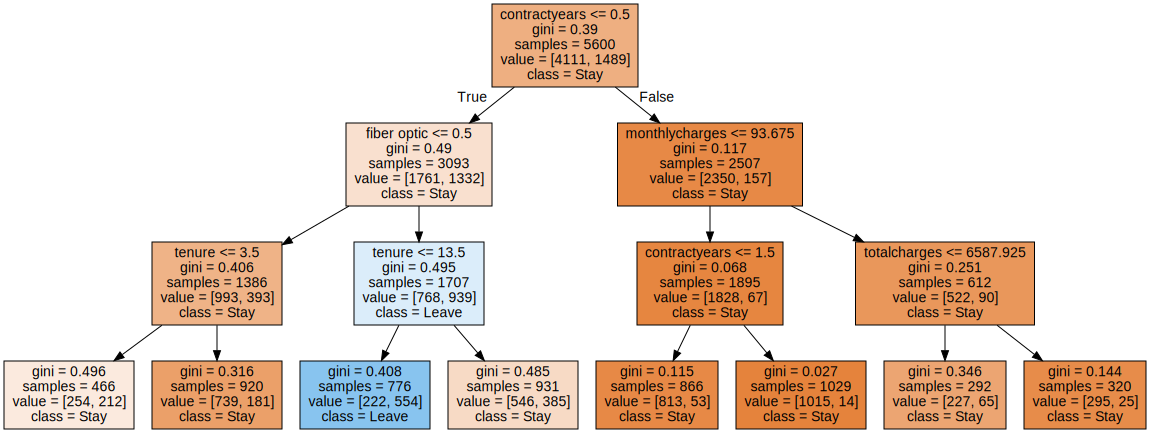

In [169]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pylab

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))
    

  
plot_tree(clf, x_train.columns, ['Stay', 'Leave'])

# Here we Use a Loop to Calculate the Best Estimator

## In this case with a DecisionTree


In [86]:
from sklearn.metrics import accuracy_score

l = []
for i in range(1,20):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
    l.append(test_acc)


n = max(l) 
index = l.index(n)
print (f'Ideal Parameter is {index} and the accuracy is {n}')

Ideal Parameter is 6 and the accuracy is 0.7782397782397782


In [87]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7498267498267498

In [88]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7782397782397782

In [89]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=1)
# define the algorithm:
    # arg:
        # n_estimators = number of trees
        # max_dept = the maximum depth of the trees
        # random_state =
            # basically, an algorithm is repeated a number of times using random selections of features and samples. The random_state parameter allows controlling these random choices.
            # if you call this with random_state=1 (or any other value), then each and every time, you'll get the same result.
            
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid': customerid_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv


In [90]:
output

,customerid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296-DDOOR,0.0,0.0
4627,3680-CTHUH,0.0,0.0
3225,4931-TRZWN,0.0,0.0
2828,8559-WNQZS,0.0,0.0
3768,3537-HPKQT,0.0,0.0
...,...,...,...
6783,9867-XOBQA,0.0,0.0
2883,7225-IILWY,0.0,0.0
893,9227-LUNBG,1.0,0.0
4513,8580-QVLOC,1.0,0.0


In [91]:
l = []
for i in range(1,20):
    model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)        
    model.fit(x_train, y_train)
    y_test_pred_RandomForest = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
    l.append(test_acc)


n = max(l) 
index = l.index(n)
print (f'Ideal Parameter is {index} and the accuracy is {n}')

Ideal Parameter is 7 and the accuracy is 0.7962577962577962


In [92]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7796257796257796

In [93]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7907137907137907

In [94]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.01918495, 0.01647276, 0.17956233, 0.00886839, 0.01701736,
       0.02571221, 0.01891614, 0.01540776, 0.02619314, 0.0186594 ,
       0.01417995, 0.02736974, 0.16093689, 0.17433929, 0.01646628,
       0.0160567 , 0.08597254, 0.12844526, 0.03023893])

In [95]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
2,tenure,0.179562
13,totalcharges,0.174339
12,monthlycharges,0.160937
17,contractyears,0.128445
16,fiber optic,0.085973
18,automatic paymentmethod,0.030239
11,paperlessbilling,0.027370
8,techsupport,0.026193
5,onlinesecurity,0.025712
0,seniorcitizen,0.019185


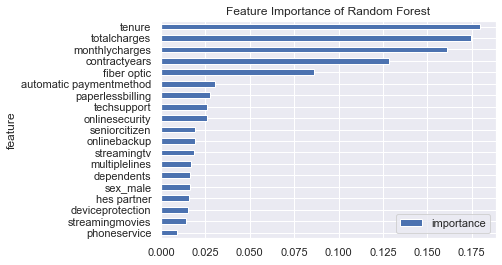

In [96]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');
plt.savefig("feature importance of rendom forest.jpg")

In [97]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=24)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customerid': customerid_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv


In [98]:
output

,customerid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296-DDOOR,0.0,0.0
4627,3680-CTHUH,0.0,0.0
3225,4931-TRZWN,0.0,0.0
2828,8559-WNQZS,0.0,0.0
3768,3537-HPKQT,0.0,0.0
...,...,...,...
6783,9867-XOBQA,0.0,0.0
2883,7225-IILWY,0.0,0.0
893,9227-LUNBG,1.0,0.0
4513,8580-QVLOC,1.0,0.0


In [99]:
l = []
for i in range(1,200):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred_Knn)
    l.append(test_acc)
n = max(l) 
index = l.index(n)
print (f'Ideal Parameter is {index} and the accuracy is {n}')

Ideal Parameter is 24 and the accuracy is 0.7803187803187803


In [100]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7664587664587664

In [101]:
clf = KNeighborsClassifier(n_neighbors=35)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7713097713097713

In [102]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [157]:
type(churn)

pandas.core.frame.DataFrame

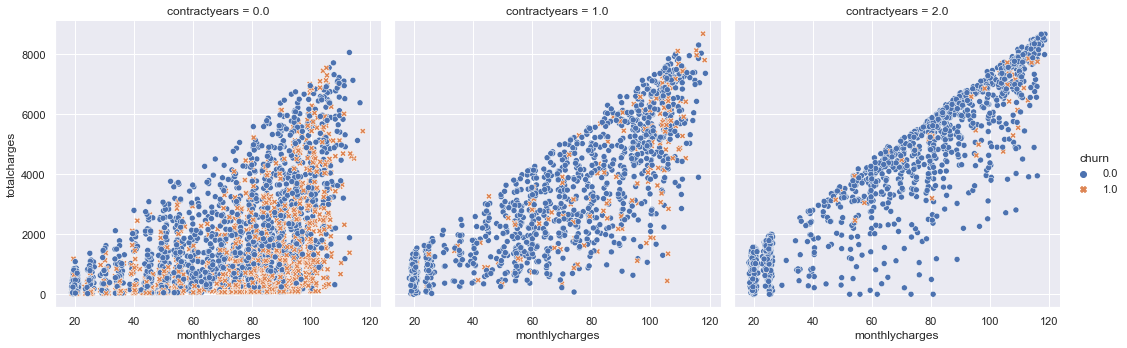

In [158]:
# Create a visualization
sns.relplot(
    data=churn,
    x="monthlycharges", y="totalcharges",col="contractyears",
    hue="churn", style="churn",
)


#This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function relplot().
# Notice how we provided only the names of the variables and their roles in the plot.
# Unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes.
# Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands.
# This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.

# arg:
  # x --> x axis
  # y --> y axis
  # col --> 2 plots (subsets)
  # hue --> Color
  # style --> Shape
  # size  --> size of each mark


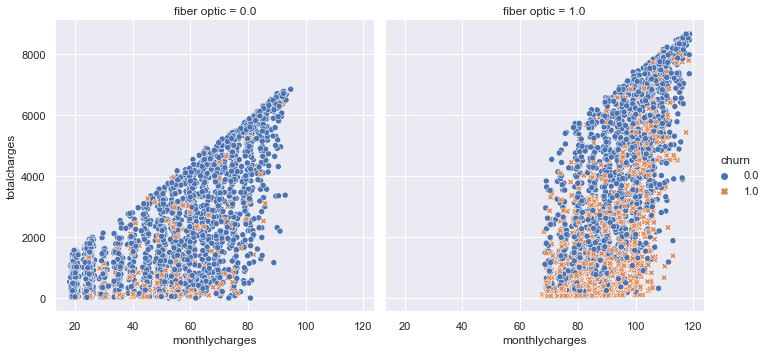

In [138]:
sns.relplot(
    data=churn,
    x="monthlycharges", y="totalcharges",col="fiber optic",
    hue="churn", style="churn",
)
plt.savefig("monthlycharge by fiber optic.jpg")

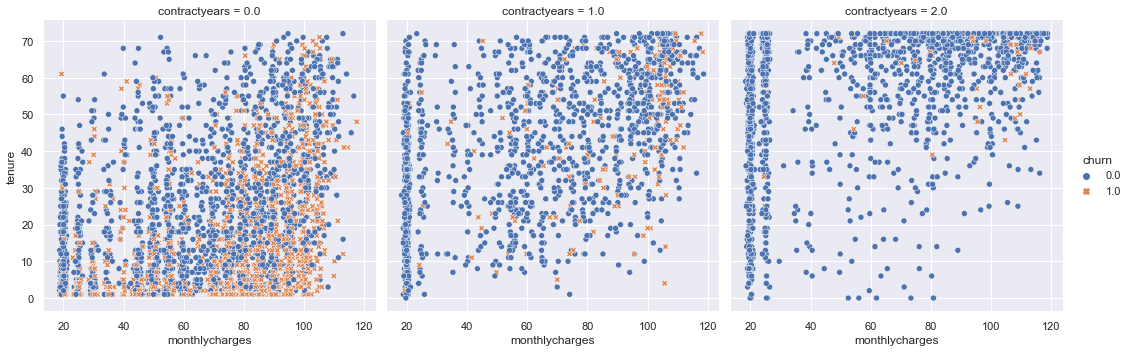

In [139]:
sns.relplot(
    data=churn,
    x="monthlycharges", y="tenure",col="contractyears",
    hue="churn", style="churn",
)              
plt.savefig("tenure by contractyears.jpg")

In [140]:
churnbyauto1 = pd.DataFrame(churn.groupby('automatic paymentmethod').churn.sum())
churnbyauto1

,churn
automatic paymentmethod,
0.0,1379.0
1.0,490.0


In [141]:
churnbyauto2 = pd.DataFrame(churn.groupby('automatic paymentmethod').churn.count())
churnbyauto2

,churn
automatic paymentmethod,
0.0,3977
1.0,3066


In [142]:
churnratebyauto = churnbyauto1/churnbyauto2
churnratebyauto

,churn
automatic paymentmethod,
0.0,0.346744
1.0,0.159817


In [143]:
churnbyfiber1 = pd.DataFrame(churn.groupby('fiber optic').churn.sum())
churnbyfiber1

,churn
fiber optic,
0.0,572.0
1.0,1297.0


In [144]:
churnbyfiber2 = pd.DataFrame(churn.groupby('fiber optic').churn.count())
churnbyfiber2

,churn
fiber optic,
0.0,3947
1.0,3096


In [145]:
churnratebyfiber = churnbyfiber1/churnbyfiber2
churnratebyfiber

,churn
fiber optic,
0.0,0.144920
1.0,0.418928


In [146]:
churn['tenuregroup'] = None
churn.loc[(churn['tenure'] <= 6),'tenuregroup'] = '0-6'
churn.loc[(churn['tenure'] >  6) & (churn['tenure'] <=12), 'tenuregroup'] = '7-12'
churn.loc[(churn['tenure'] > 12) & (churn['tenure'] <=18), 'tenuregroup'] = '13-18'
churn.loc[(churn['tenure'] > 18) & (churn['tenure'] <=24), 'tenuregroup'] = '19-24'
churn.loc[(churn['tenure'] > 24) & (churn['tenure'] <=30), 'tenuregroup'] = '25-30'
churn.loc[(churn['tenure'] > 30) & (churn['tenure'] <=36), 'tenuregroup'] = '31-36'
churn.loc[(churn['tenure'] > 36) & (churn['tenure'] <=42), 'tenuregroup'] = '37-42'
churn.loc[(churn['tenure'] > 42) & (churn['tenure'] <=48), 'tenuregroup'] = '43-48'
churn.loc[(churn['tenure'] > 48) & (churn['tenure'] <=54), 'tenuregroup'] = '49-54'
churn.loc[(churn['tenure'] > 54) & (churn['tenure'] <=60), 'tenuregroup'] = '55-60'
churn.loc[(churn['tenure'] > 60) & (churn['tenure'] <=66), 'tenuregroup'] = '61-66'
churn.loc[(churn['tenure'] > 66),'tenuregroup'] = '67+'

In [147]:
churnbytenure1 = pd.DataFrame(churn.groupby('tenuregroup').churn.sum())
churnbytenure1

,churn
tenuregroup,
0-6,784.0
13-18,177.0
19-24,117.0
25-30,94.0
31-36,86.0
37-42,83.0
43-48,62.0
49-54,68.0
55-60,52.0


In [148]:
churnbytenure2 = pd.DataFrame(churn.groupby('tenuregroup').churn.count())
churnbytenure2

,churn
tenuregroup,
0-6,1481
13-18,548
19-24,476
25-30,431
31-36,401
37-42,379
43-48,383
49-54,420
55-60,412


In [149]:
churnbytenure1/churnbytenure2
churnrate = churnbytenure1/churnbytenure2

churnrate 

,churn
tenuregroup,
0-6,0.529372
13-18,0.322993
19-24,0.245798
25-30,0.218097
31-36,0.214464
37-42,0.218997
43-48,0.161880
49-54,0.161905
55-60,0.126214


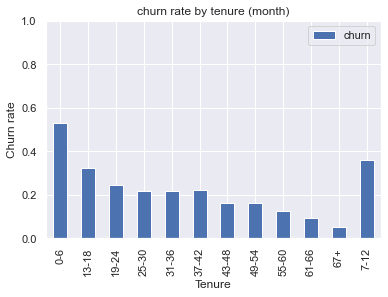

In [150]:
churnrate.plot(kind='bar')
plt.xlabel('Tenure')
plt.ylabel('Churn rate')
plt.ylim(0, 1)
plt.title('churn rate by tenure (month)')
plt.savefig("churn rate by tenure (month).jpg")

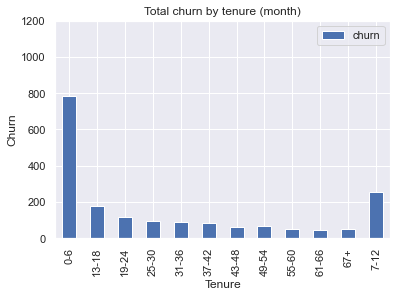

In [151]:
churnbytenure1.plot(kind='bar')
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.ylim(0, 1200)
plt.title('Total churn by tenure (month)')
plt.savefig("Total churn by tenure (month).jpg")

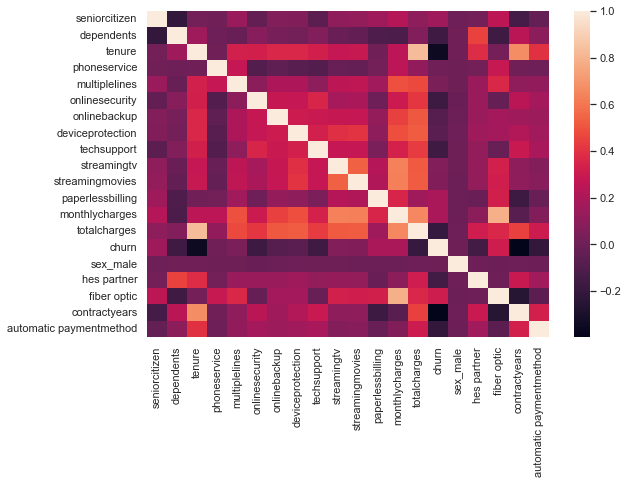

In [152]:
sns.set(rc = {'figure.figsize':(9,6)})
sns.heatmap(churn.corr())
plt.savefig("heat map correltion.jpg")

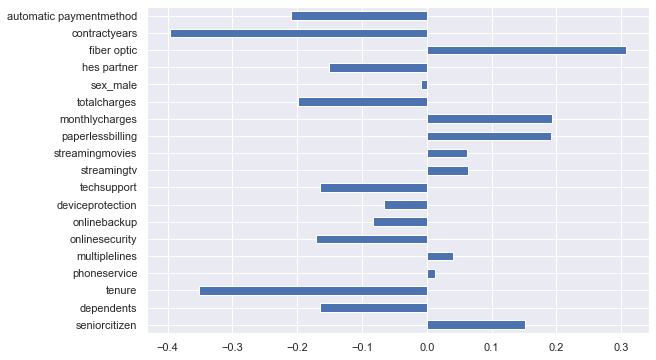

In [153]:
churn.corr()['churn'].drop('churn').plot(kind='barh')
plt.savefig("feateures to churn correlation).jpg")

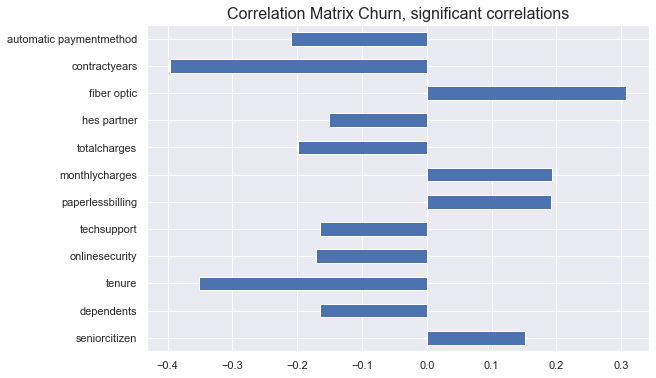

In [154]:
churn.corr()['churn'].drop('churn').drop('phoneservice').drop('sex_male').drop('multiplelines').drop('streamingmovies').drop('streamingtv').drop('deviceprotection').drop('onlinebackup').plot(kind='barh')
plt.savefig("top feateures to churn correlation).jpg")
plt.title('Correlation Matrix Churn, significant correlations', fontsize=16);

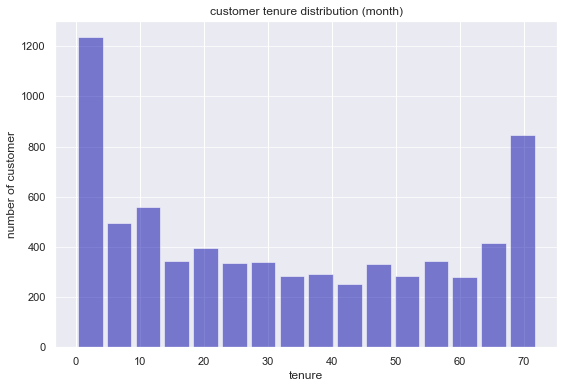

In [155]:
plt.hist(x=churn['tenure'].dropna(), bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('tenure')
plt.ylabel('number of customer')
plt.title('customer tenure distribution (month)')
plt.savefig("customer tenure distribution (month).jpg")

C:\Users\adama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totalcharges', ylabel='Density'>

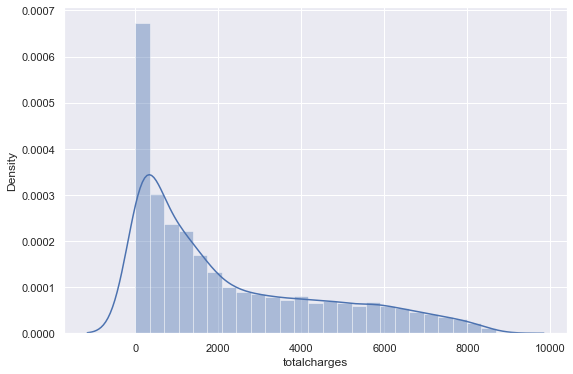

In [171]:
sns.distplot(churn['totalcharges'].dropna())

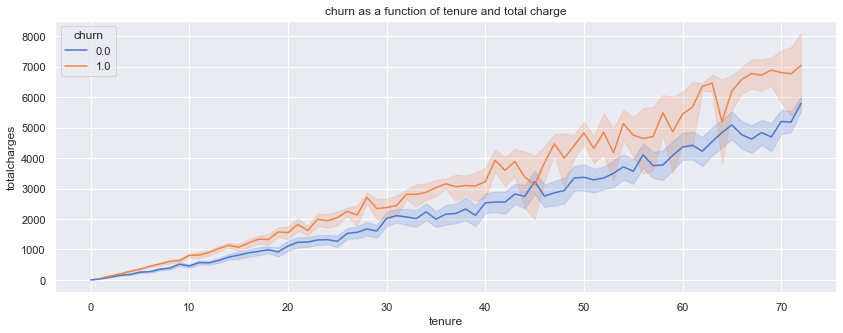

In [176]:
plt.figure(figsize=(14, 5))

sns.lineplot(data = churn,
             x="tenure",
             y="totalcharges",
             hue = "churn",
             palette = "muted"
             )

plt.title("churn as a function of tenure and total charge")
plt.show()

Text(0.5, 1.0, 'Churn')

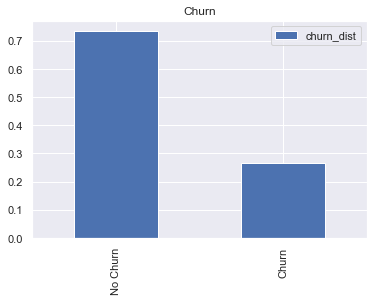

In [114]:
chrun_distribution = churn.churn.value_counts(normalize=True)
churn_stats = pd.DataFrame({'churn_dist':chrun_distribution})
churn_stats.index = churn_stats.index.map({0.0:'No Churn', 1.0:'Churn',})
churn_stats.plot(kind='bar');
plt.title('Churn')

Text(0.5, 1.0, 'Churn')

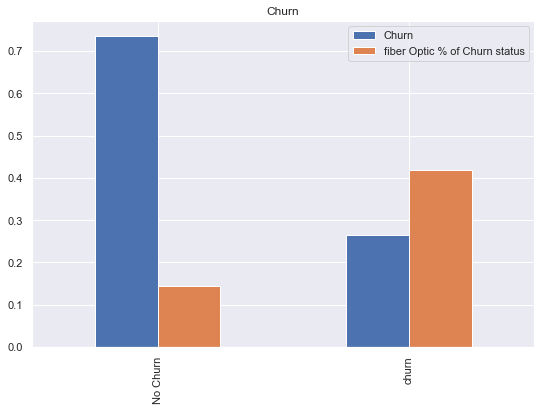

In [194]:
chrun_distribution = churn.churn.value_counts(normalize=True)
fiberopticdist = churn.fiber_optic.value_counts(normalize=True)
churn_stats = pd.DataFrame({'Churn':chrun_distribution, 'fiber Optic % of Churn status': fiberopticchurn})
churn_stats.index = churn_stats.index.map({0.0:'No Churn', 1.0:'churn',})
churn_stats.plot(kind='bar');
plt.title('Churn')